<a href="https://colab.research.google.com/github/hrkzz/Data_analysis_examples/blob/master/2_1_Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Packages

In [0]:
#基本ライブラリ
import numpy as np
import pandas as pd

#図形描画ライブラリ
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,4

# 統計モデル
import statsmodels.api as sm

#Data

machine_temperature_system_failure.csv: <br>
Temperature sensor data of an internal component of a large, industrial mahcine. The first anomaly is a planned shutdown of the machine. The second anomaly is difficult to detect and directly led to the third anomaly, a catastrophic failure of the machine.<br>
This data comes from <https://github.com/numenta/NAB>

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/machine_temperature_system_failure.csv')

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
timestamp    22695 non-null object
value        22695 non-null float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB


In [105]:
data.head()

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


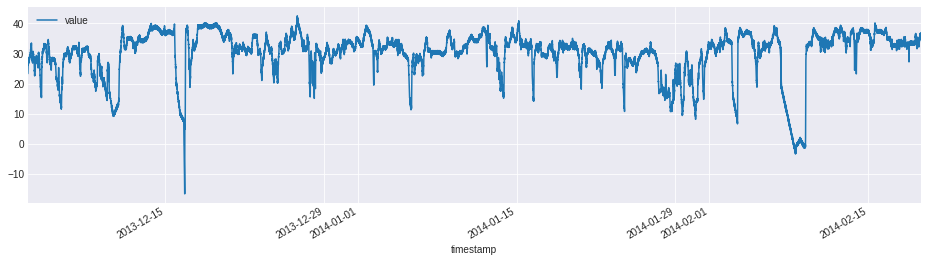

In [106]:
#change the type of timestamp for plot
data['timestamp'] = pd.to_datetime(data['timestamp'])

#change fahrenheit to c
data['value'] = (data['value'] - 32) * 5/9

#plot
rcParams['figure.figsize'] = 16,4
data.plot(x='timestamp', y='value')

#Modelling by local level

In [112]:
mod_local_level = sm.tsa.UnobservedComponents(data.value.iloc[1:], 'local level')
res_local_level = mod_local_level.fit()
print(res_local_level.summary())

                        Unobserved Components Results                         
Dep. Variable:                  value   No. Observations:                22694
Model:                    local level   Log Likelihood              -19944.390
Date:                Sat, 11 May 2019   AIC                          39892.780
Time:                        13:22:49   BIC                          39908.840
Sample:                             0   HQIC                         39898.002
                              - 22694                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0680      0.001     55.716      0.000       0.066       0.070
sigma2.level         0.2172      0.001    233.549      0.000       0.215       0.219
Ljung-Box (Q):              

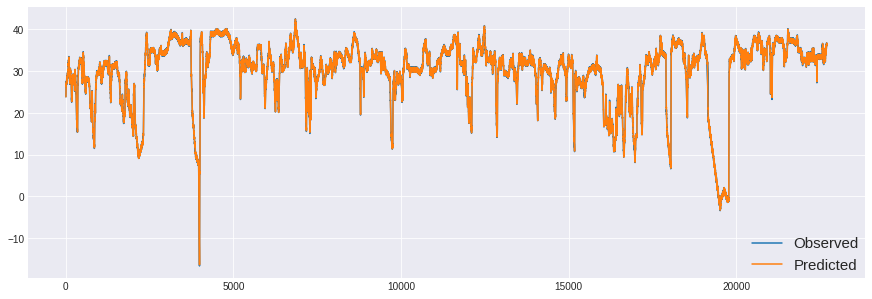

In [113]:
rcParams['figure.figsize'] = 15,5
plt.plot(data.value.iloc[1:], label='Observed')
plt.plot(res_local_level.fittedvalues[1:], label='Predicted')
plt.legend(loc='lower right', borderaxespad=0, fontsize=15)

#Anomaly detection

Text(0.5, 1.0, 'anomaly detection')

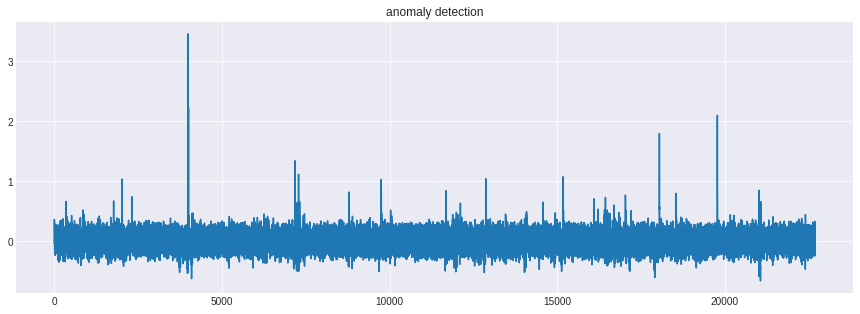

In [115]:
sigma = res_local_level.params[0] + res_local_level.params[1]

anomaly_detection = (data.value - res_local_level.fittedvalues[1:])*sigma
  
plt.plot(anomaly_detection)
plt.title('anomaly detection')